In [1]:
import numpy as np
from glob import glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import os
from tqdm import tqdm
import time


import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder

pd.set_option('display.max_columns', None)

In [2]:
glob('*.csv')

['insurance.csv']

In [3]:
# Seed 고정

def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)

seed_everything(42)

In [4]:
data = pd.read_csv('insurance.csv',encoding='utf-8')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
# Null Check

data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


- Not Null

In [9]:
#sex
le = LabelEncoder()
le.fit(data.sex.drop_duplicates()) 
data.sex = le.transform(data.sex)
# smoker or not
le.fit(data.smoker.drop_duplicates()) 
data.smoker = le.transform(data.smoker)
#region
le.fit(data.region.drop_duplicates()) 
data.region = le.transform(data.region)

In [10]:
data.corr()['charges'].sort_values()

region     -0.006208
sex         0.057292
children    0.067998
bmi         0.198341
age         0.299008
smoker      0.787251
charges     1.000000
Name: charges, dtype: float64

<AxesSubplot: >

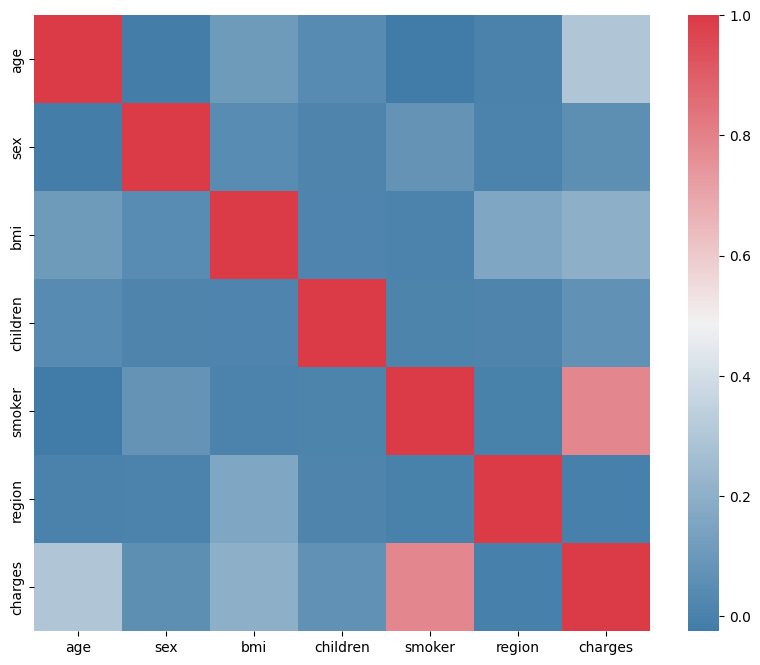

In [11]:
f, ax = plt.subplots(figsize=(10, 8))
corr = data.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(240,10,as_cmap=True),
            square=True, ax=ax)

## corr 높은 순으로 분석

In [12]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


(array([ 30., 127., 234., 319., 288., 195.,  96.,  32.,  14.,   3.]),
 array([15.96 , 19.677, 23.394, 27.111, 30.828, 34.545, 38.262, 41.979,
        45.696, 49.413, 53.13 ]),
 <BarContainer object of 10 artists>)

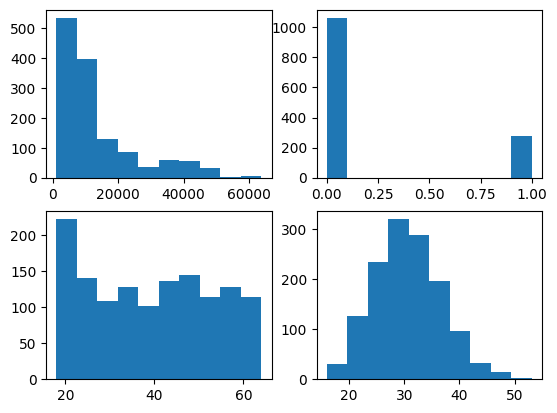

In [13]:
fig, axes = plt.subplots(2,2)
axes[0,0].hist(data['charges'])
axes[0,1].hist(data['smoker'])
axes[1,0].hist(data['age'])
axes[1,1].hist(data['bmi'])

In [14]:
def eda(col1 : str, col2 : str):
    data.groupby([col2, col1])[['charges']].mean()
    smoker_grouped = data.groupby([col1, col2])
    smoker_group_mean_charges = smoker_grouped['charges'].mean().unstack()
    smoker_group_mean_charges.plot(kind='bar')
    plt.xlabel(col1)
    plt.ylabel('Mean Charges')
    plt.title(f'Mean Medical Charges by {col1} Group and {col2} Status')
    plt.show()

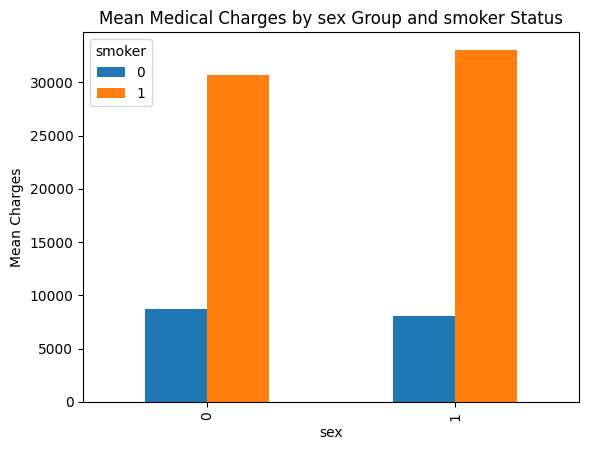

In [15]:
eda('sex','smoker')

In [16]:
# 흡연 여부에 따른 연령대의 진료비 청구금액 평균 비교를 위해 연령대 그룹화

data['age_group'] = pd.cut(data['age'], bins=[0, 19, 29, 39, 49, 59, np.inf], labels=['10s', '20s', '30s', '40s', '50s', '60s+'])

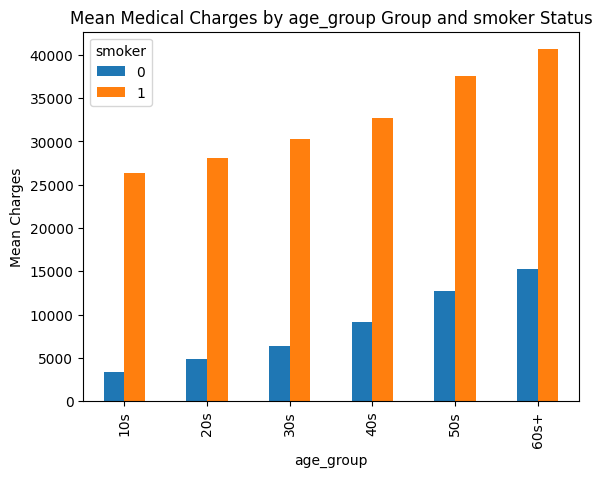

In [17]:
eda('age_group','smoker')

In [18]:
# 흡연 여부에 따른 BMI별 의료비 청구금액의 평균을 구하기 위해 BMI그룹화

bins = [0, 18.5, 25, 30, 35, 40, np.inf]
labels = ['Underweight', 'Normal', 'Overweight', 'Obese I', 'Obese II', 'Obese III']
data['bmi_group'] = pd.cut(data['bmi'], bins=bins, labels=labels)

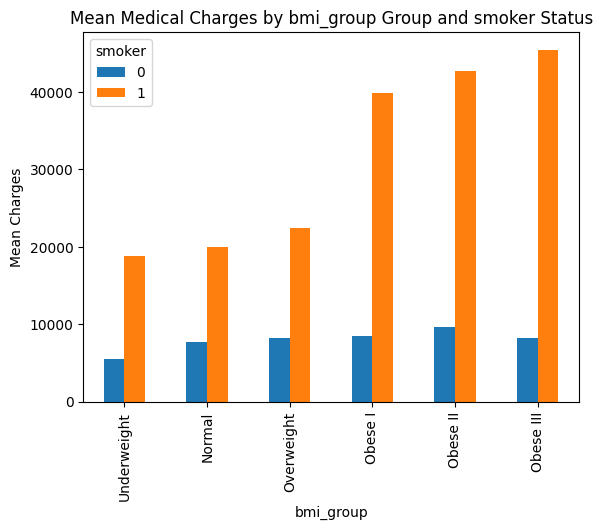

In [19]:
eda('bmi_group','smoker')

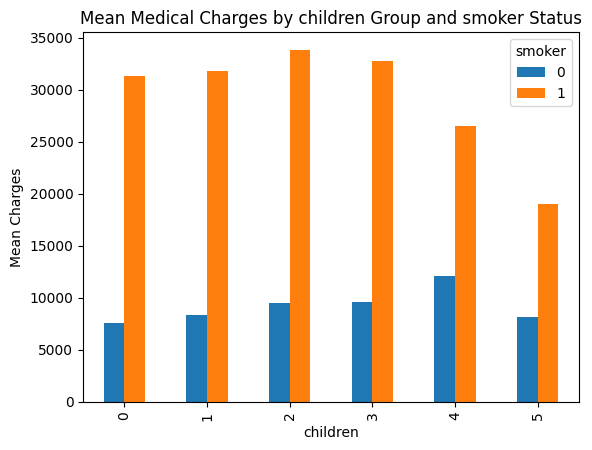

In [75]:
eda('children','smoker')

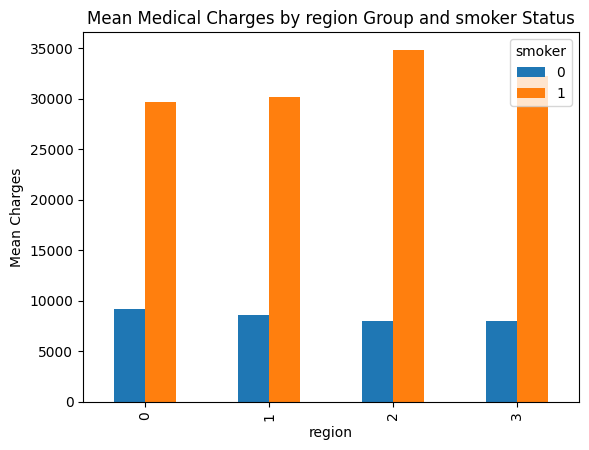

In [76]:
eda('region','smoker')

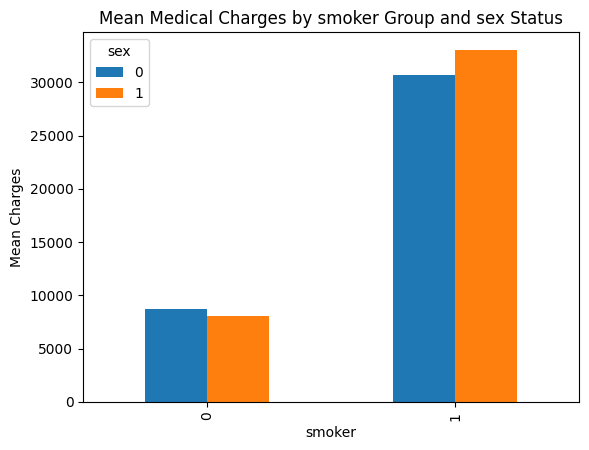

In [77]:
eda('smoker','sex')

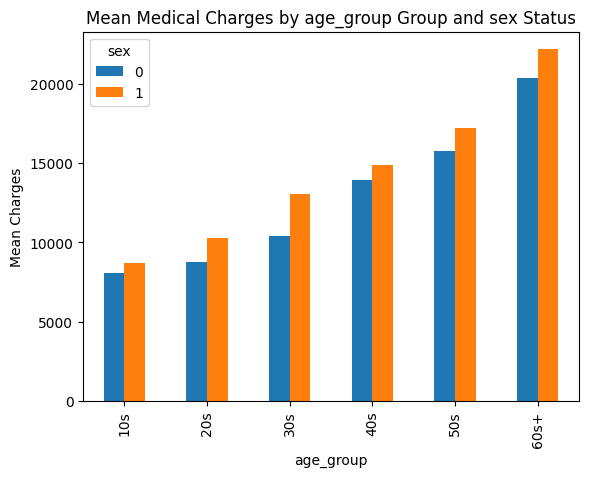

In [78]:
eda('age_group','sex')

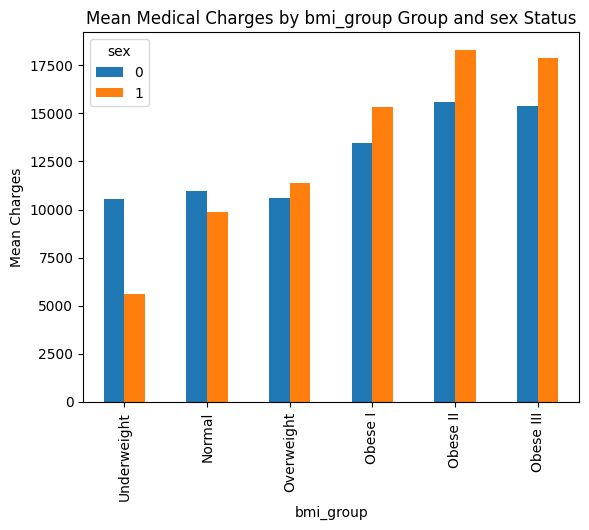

In [79]:
eda('bmi_group','sex')

### Outlier Detection

{'whiskers': [<matplotlib.lines.Line2D at 0x152386b80>,
 'caps': [<matplotlib.lines.Line2D at 0x152418610>,
 'boxes': [<matplotlib.lines.Line2D at 0x1523ecd30>],
 'medians': [<matplotlib.lines.Line2D at 0x152418a60>],
 'fliers': [<matplotlib.lines.Line2D at 0x152418d00>],
 'means': []}

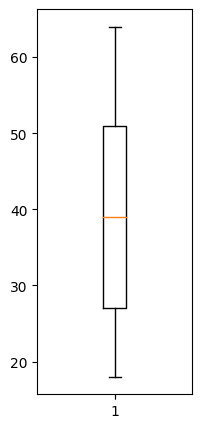

In [26]:
# 이상치 탐지를 위해 boxplot을 그려보겠습니다.
fig,ax = plt.subplots(figsize=(2,5))
plt.xticks([1],
           ['age'])
ax.boxplot(data['age'],sym='b*')
# sns.boxplot(data=data, y='age')

<AxesSubplot: ylabel='children'>

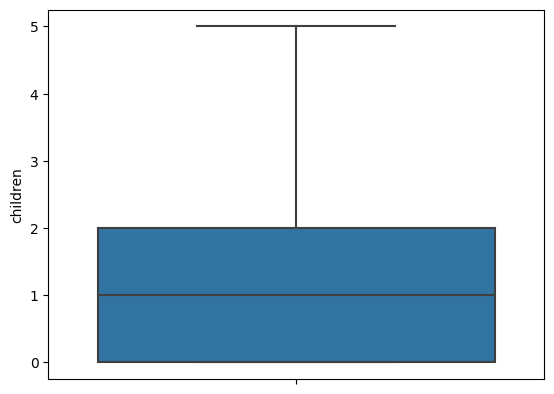

In [10]:
plt.subplot(1,1,1)
sns.boxplot(data=data, y='children')

<AxesSubplot: ylabel='bmi'>

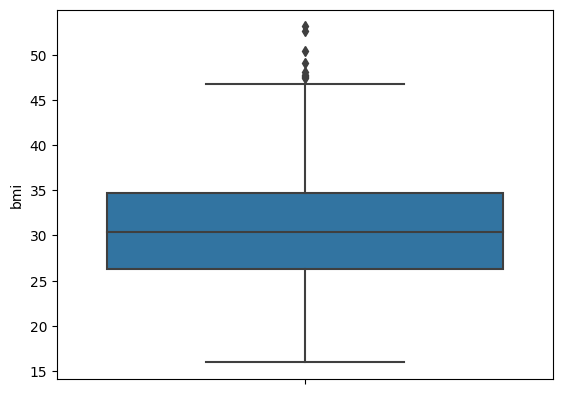

In [11]:
plt.subplot(1,1,1)
sns.boxplot(data=data, y='bmi')

<AxesSubplot: ylabel='charges'>

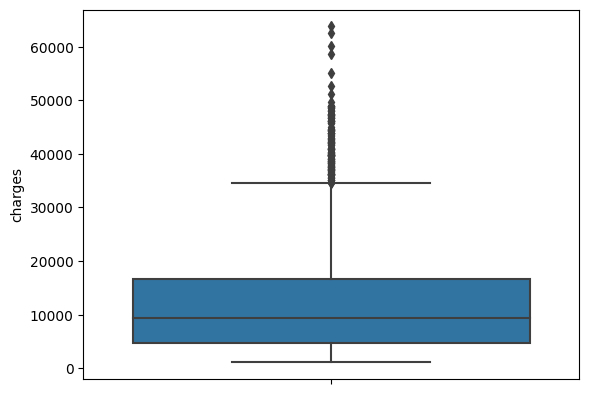

In [12]:
plt.subplot(1,1,1)
sns.boxplot(data=data, y='charges')

In [84]:
# IQR(Q3 - Q1)로부터 이상치 파악하기
bmi_q1 = data['bmi'].quantile(q=0.25)
bmi_q3 = data['bmi'].quantile(q=0.75)
iqr = bmi_q3 - bmi_q1

# (q1 - (iqr * 1.5))와 (q3 + (iqr * 1.5))를 벗어난 값이 이상치입니다.
condi1 = (data['bmi'] < (bmi_q1 - (1.5 * iqr)))
condi2 = (data['bmi'] > (bmi_q3 + (1.5 * iqr)))
outliers = data[condi1 | condi2]
outliers['bmi']

116     49.06
286     48.07
401     47.52
543     47.41
847     50.38
860     47.60
1047    52.58
1088    47.74
1317    53.13
Name: bmi, dtype: float64

<AxesSubplot: xlabel='charges', ylabel='Count'>

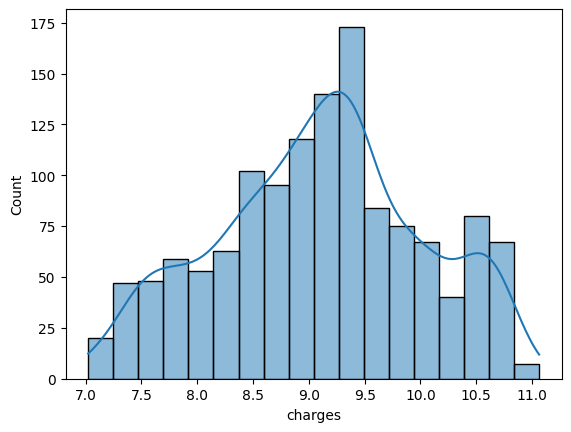

In [156]:
# 진료비 금액의 count barplot

sns.histplot(np.log(data.charges), kde=True)

<AxesSubplot: xlabel='charges', ylabel='Count'>

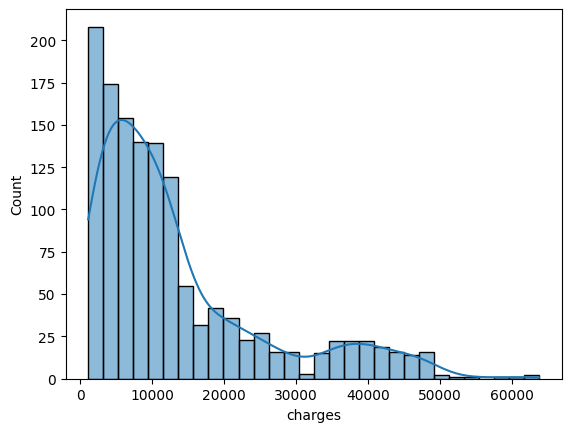

In [158]:
sns.histplot(data.charges, kde=True)

In [87]:
# resampling

from sklearn.utils import resample

results_median = []
results_mean = []

In [88]:
# 중앙값을 resampling 하여 리스트에 append

for nrepeat in range(1000):
    sample = resample(data['charges'])
    results_median.append(sample.median())

In [90]:
# 평균값을 resampling 하여 리스트에 append

for nrepeat in range(1000):
    sample = resample(data['charges'])
    results_mean.append(sample.mean())

In [91]:
# 각각의 list를 Series 형태로 변환

results_median = pd.Series(results_median)
results_mean = pd.Series(results_mean)

<AxesSubplot: ylabel='Count'>

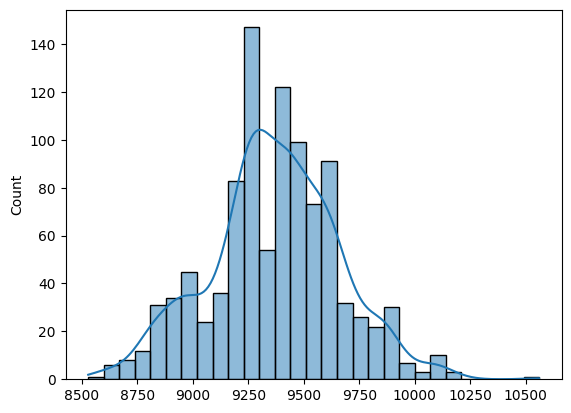

In [92]:
# resampling한 중앙값 데이터를 시각화

sns.histplot(results_median, kde=True)

In [93]:
# 범주형 변수와 수치형 변수를 분리

cat_features = data.select_dtypes(include=['object']).columns.to_list()
num_features = data.select_dtypes(exclude=['object']).columns.to_list()

In [101]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'age_group', 'bmi_group'],
      dtype='object')

In [125]:
data.head()

,age,sex,bmi,children,smoker,region,charges,age_group,bmi_group
0,19,0,27.900,0,1,3,16884.92400,10s,Overweight
1,18,1,33.770,1,0,2,1725.55230,10s,Obese I
2,28,1,33.000,3,0,2,4449.46200,20s,Obese I
3,33,1,22.705,0,0,1,21984.47061,30s,Normal
4,32,1,28.880,0,0,1,3866.85520,30s,Overweight


In [154]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   charges   1338 non-null   float64
dtypes: float64(2), int64(4)
memory usage: 62.8 KB


In [43]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [25]:
data = data.drop(['age_group','bmi_group','region','sex','smoker'],axis=1)

In [44]:
x = data.drop(['charges'],axis=1)

y = data['charges']

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor


from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [45]:
X_train, X_dev, y_train, y_dev = train_test_split(x,y, test_size=0.2)

In [155]:
models = [
    LinearRegression(),
    Ridge(),
    Lasso(),
    ElasticNet(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    SVR(),
    KNeighborsRegressor(),
    MLPRegressor()    
]

In [151]:
mae, mse, rsme, r2, mape, mpe, 

In [ ]:
mae

In [ ]:
mean 절댓값 error

In [ ]:
charges

In [ ]:
mpe

In [152]:
lst = []
for model in models:
    name = model.__class__.__name__
    model.fit(X_train,y_train)
    y_pred = model.predict(X_dev)
    mae = mean_absolute_error(y_dev, y_pred)
    print("Model %s - MAE: %.4f" %(name,mae))
    lst.append([model,mae])

Model LinearRegression - MAE: 4577.4768
Model Ridge - MAE: 4583.8766
Model Lasso - MAE: 4577.7436
Model ElasticNet - MAE: 7210.3008
Model DecisionTreeRegressor - MAE: 2918.4322
Model RandomForestRegressor - MAE: 3102.2015
Model SVR - MAE: 6757.8300
Model KNeighborsRegressor - MAE: 7657.7429
Model MLPRegressor - MAE: 7272.1786


In [60]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'age_group', 'bmi_group'],
      dtype='object')

In [169]:
data = pd.read_csv('insurance.csv',encoding='utf-8')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [40]:
# 흡연 여부에 따른 연령대의 진료비 청구금액 평균 비교를 위해 연령대 그룹화

data['age_group'] = pd.cut(data['age'], bins=[0, 19, 29, 39, 49, 59, np.inf], labels=['10s', '20s', '30s', '40s', '50s', '60s+'])

In [39]:
bins = [0, 18.5, 25, 30, 35, 40, np.inf]
labels = ['Underweight', 'Normal', 'Overweight', 'Obese I', 'Obese II', 'Obese III']
data['bmi_group'] = pd.cut(data['bmi'], bins=bins, labels=labels)

In [67]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse=False)

In [68]:
def one_hot_encoded(df):
    ohe.fit(df.values.reshape(-1,1))
    one_hot_encoded = ohe.transform(df.values.reshape(-1,1))
    ohe_df = pd.DataFrame(one_hot_encoded, columns=ohe.categories_[0])
    return ohe_df

In [69]:
ohe_df = one_hot_encoded(data['sex'])
data = pd.concat([data,ohe_df],axis=1)

# column rename
data.rename(columns={0:'male',1:'female'},inplace=True)

In [70]:
ohe_df = one_hot_encoded(data['smoker'])
data = pd.concat([data,ohe_df],axis=1)

# column rename
data.rename(columns={0:'Non-smoke',1:'smoker'},inplace=True)

In [71]:
ohe_df = one_hot_encoded(data['region'])
data = pd.concat([data,ohe_df],axis=1)

# column rename
data.rename(columns={0:'southwest',1:'southeast',
                     2:'northwest',3:'northeast'},inplace=True)

In [72]:
ohe_df = one_hot_encoded(data['bmi_group'])
data = pd.concat([data,ohe_df],axis=1)

# column rename
data.rename(columns={0:'Overweight',1:'Obese I',2:'Normal',
                     3:'Obese II',4:'Obese III',5:'Underweight'},inplace=True)

In [73]:
ohe_df = one_hot_encoded(data['age_group'])
data = pd.concat([data,ohe_df],axis=1)

# column rename
data.rename(columns={0:'10s',1:'20s',
                     2:'30s',3:'40s',
                     4:'60s+',5:'50s'},inplace=True)

In [74]:
data.head()

,age,sex,bmi,children,smoker,region,charges,age_group,bmi_group,male,female,Non-smoke,smoker,southwest,southeast,northwest,northeast,Normal,Obese I,Obese II,Obese III,Overweight,Underweight,10s,20s,30s,40s,50s,60s+
0,19,0,27.900,0,1,3,16884.92400,10s,Overweight,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,18,1,33.770,1,0,2,1725.55230,10s,Obese I,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,28,1,33.000,3,0,2,4449.46200,20s,Obese I,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,33,1,22.705,0,0,1,21984.47061,30s,Normal,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,32,1,28.880,0,0,1,3866.85520,30s,Overweight,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [185]:
data.bmi_group.unique()

['Overweight', 'Obese I', 'Normal', 'Obese II', 'Obese III', 'Underweight']
Categories (6, object): ['Underweight' < 'Normal' < 'Overweight' < 'Obese I' < 'Obese II' < 'Obese III']

In [75]:
data = data.drop(['age_group','bmi_group','region','sex','smoker'],axis=1)
data.head()

,age,bmi,children,charges,male,female,Non-smoke,southwest,southeast,northwest,northeast,Normal,Obese I,Obese II,Obese III,Overweight,Underweight,10s,20s,30s,40s,50s,60s+
0,19,27.900,0,16884.92400,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,18,33.770,1,1725.55230,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,28,33.000,3,4449.46200,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,33,22.705,0,21984.47061,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,32,28.880,0,3866.85520,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [76]:
x = data.drop(['charges'],axis=1)

y = data['charges']

In [77]:
X_train, X_dev, y_train, y_dev = train_test_split(x,y, test_size=0.2)

In [191]:
models = [
    LinearRegression(),
    Ridge(),
    Lasso(),
    ElasticNet(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    SVR(),
    KNeighborsRegressor(),
    MLPRegressor()    
]

In [192]:
lst = []
for model in models:
    name = model.__class__.__name__
    model.fit(X_train,y_train)
    y_pred = model.predict(X_dev)
    mae = mean_absolute_error(y_dev, y_pred)
    print("Model %s - MAE: %.4f" %(name,mae))
    lst.append([model,mae])

Model LinearRegression - MAE: 4434.6445
Model Ridge - MAE: 4430.3974
Model Lasso - MAE: 4431.4051
Model ElasticNet - MAE: 6061.8594
Model DecisionTreeRegressor - MAE: 3203.7152
Model RandomForestRegressor - MAE: 2869.8130
Model SVR - MAE: 8070.3666
Model KNeighborsRegressor - MAE: 6867.1731
Model MLPRegressor - MAE: 7577.1840


In [193]:
import pycaret

In [194]:
from pycaret.regression import RegressionExperiment

s = RegressionExperiment()
s.setup(data, target = 'charges', session_id = 123)
best = s.compare_models()

,Description,Value
0,Session id,123
1,Target,charges
2,Target type,Regression
3,Original data shape,"(1338, 24)"
4,Transformed data shape,"(1338, 24)"
5,Transformed train set shape,"(936, 24)"
6,Transformed test set shape,"(402, 24)"
7,Numeric features,23
8,Preprocess,True
9,Imputation type,simple


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2701.6419,23293759.9682,4806.2493,0.8338,0.4480,0.3181,0.0200
rf,Random Forest Regressor,2802.6681,25366609.9949,5023.7201,0.8170,0.4765,0.3434,0.0490
catboost,CatBoost Regressor,2885.6382,25682894.7005,5054.9683,0.8162,0.4921,0.3627,0.2920
ada,AdaBoost Regressor,4261.7276,28944148.1909,5370.3325,0.7944,0.6358,0.7310,0.0080
et,Extra Trees Regressor,2840.8579,29742598.1231,5418.8141,0.7833,0.4947,0.3509,0.0480
xgboost,Extreme Gradient Boosting,3307.7649,31624578.0000,5606.4348,0.7706,0.5653,0.4121,0.1580
br,Bayesian Ridge,4301.6112,37419464.3648,6094.9895,0.7381,0.5872,0.4606,0.0060
ridge,Ridge Regression,4301.0145,37438460.0000,6096.5688,0.7379,0.5911,0.4606,0.0060
lasso,Lasso Regression,4298.5081,37447378.8000,6097.3192,0.7378,0.5900,0.4600,0.0070
lr,Linear Regression,4301.5493,37470494.6000,6099.2161,0.7376,0.5966,0.4607,0.1730


- MAE 기준 상위 모델 5개 선정(?)

gbr, rf, et, cat, huber

In [12]:
!pip install Catboost

In [46]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from catboost import CatBoostRegressor
from sklearn.linear_model import HuberRegressor
from sklearn.model_selection import RandomizedSearchCV

In [78]:
gbr = GradientBoostingRegressor()
rf = RandomForestRegressor()
ef = ExtraTreesRegressor()
cat = CatBoostRegressor()
huber = HuberRegressor()

models = [gbr, rf, ef, cat, huber]

In [79]:
lst = []
for model in models:
    name = model.__class__.__name__
    model.fit(X_train,y_train)
    y_pred = model.predict(X_dev)
    mae = mean_absolute_error(y_dev, y_pred)
    print("Model %s - MAE: %.4f" %(name,mae))
    r2 = r2_score(y_dev, y_pred)
    mpe = np.mean((y_dev - y_pred) / y_dev) * 100
    lst.append([model,mae,mpe,r2])

Model GradientBoostingRegressor - MAE: 2692.2667
Model RandomForestRegressor - MAE: 2916.2392
Model ExtraTreesRegressor - MAE: 2720.1695
Learning rate set to 0.041383
0:	learn: 11712.3436461	total: 1.08ms	remaining: 1.08s
1:	learn: 11368.8973368	total: 2.26ms	remaining: 1.13s
2:	learn: 11005.8907239	total: 2.58ms	remaining: 857ms
3:	learn: 10679.6303600	total: 3.1ms	remaining: 773ms
4:	learn: 10363.0904365	total: 3.52ms	remaining: 701ms
5:	learn: 10075.5761412	total: 4ms	remaining: 662ms
6:	learn: 9798.6614569	total: 4.19ms	remaining: 595ms
7:	learn: 9522.4397147	total: 4.65ms	remaining: 577ms
8:	learn: 9259.9733597	total: 5ms	remaining: 550ms
9:	learn: 9003.9114575	total: 5.3ms	remaining: 524ms
10:	learn: 8771.0782933	total: 5.64ms	remaining: 507ms
11:	learn: 8547.5076984	total: 6.34ms	remaining: 522ms
12:	learn: 8344.5451684	total: 6.79ms	remaining: 515ms
13:	learn: 8131.3239698	total: 7.21ms	remaining: 508ms
14:	learn: 7927.9561857	total: 7.68ms	remaining: 504ms
15:	learn: 7742.7716

In [80]:
df = pd.DataFrame(lst).rename(columns={1:'mae',2:'mpe',3:'r2'})
df[0][0] = 'GradientBoostingRegressor'
df[0][1] = 'DecisionTreeRegressor'
df[0][2] = 'ExtraTreeRegressor'
df[0][3] = 'CatBoostRegressor'
df[0][4] = 'HuberRegressor'

In [81]:
df.rename(columns={0:'model'})

,model,mae,mpe,r2
0,GradientBoostingRegressor,2692.266722,-11.694782,0.819006
1,DecisionTreeRegressor,2916.239185,-13.869502,0.797425
2,ExtraTreeRegressor,2720.169459,-10.148752,0.785892
3,CatBoostRegressor,2780.647775,-9.995603,0.806072
4,HuberRegressor,3829.393829,8.773306,0.651084


## Model Hyper Parameter Tuning

In [82]:
clfs = [
    (
    GradientBoostingRegressor(),
        {'n_estimators': [100, 500, 1000],
         'learning_rate': [0.001, 0.01, 0.1],
         'max_depth': [3, 5, 7],
         'min_samples_split': [2, 5, 10],
         'min_samples_leaf': [1, 2, 4],
         'subsample': [0.5, 0.7, 1.0],
         'max_features': ['auto', 'sqrt', 'log2', None]}
    ),
    (
    RandomForestRegressor(),
        {'n_estimators': [100, 500, 1000],
         'max_features': ['auto', 'sqrt', 'log2', None],
         'max_depth': [None, 5, 10, 20],
         'min_samples_split': [2, 5, 10],
         'min_samples_leaf': [1, 2, 4]},
#          'bootstrap': [True, False],
#          'oob_score': [True, False]}
    ),
    (
    ExtraTreesRegressor(),
        {'n_estimators': [100, 500, 1000],
         'max_features': ['auto', 'sqrt', 'log2', None],
         'max_depth': [None, 5, 10, 20],
         'min_samples_split': [2, 5, 10],
         'min_samples_leaf': [1, 2, 4]}
#          'bootstrap': [True, False],
#          'oob_score': [True, False]}
    ),
    (
    CatBoostRegressor(),
        {'iterations': [100, 500, 1000],
         'learning_rate': [0.001, 0.01, 0.1],
         'depth': [3, 5, 7],
         'l2_leaf_reg': [1, 3, 5, 7],
         'border_count': [32, 64, 128]}
    ),
    (
    HuberRegressor(),
        {'epsilon': [1.35, 1.5, 1.75],
         'alpha': [0.0001, 0.001, 0.01, 0.1, 1],
         'max_iter': [100, 200, 500, 1000],
         'tol': [1e-4, 1e-3, 1e-2, 1e-1]}
    )
]

In [83]:
clfs_tuned = []  # 튜닝된 모델을 저장
for clf, param_grid in tqdm(clfs):
    start = time.time()
    rand_search = RandomizedSearchCV(clf, param_grid, scoring='f1_macro', n_iter=15,cv=3, n_jobs=2)
    rand_search.fit(X_train, y_train)
    clf_name = type(clf).__name__
    y_pred = rand_search.predict(X_dev)
    mae = mean_absolute_error(y_dev, y_pred)
    print('{:30s} {:30f} {:.1f}'.format(clf_name, mae, time.time() - start))
    clfs_tuned.append((clf_name, rand_search, mae))

  0%|                                                     | 0/5 [00:00<?, ?it/s]/Users/hansol/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/hansol/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/hansol/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/hansol/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/hansol/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 1123, in f1_score
    return fbeta_sco

GradientBoostingRegressor                         7060.144199 5.2


/Users/hansol/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/hansol/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/hansol/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/hansol/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/hansol/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "/Users/hansol/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn

RandomForestRegressor                             5182.357709 8.6


/Users/hansol/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/hansol/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/hansol/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/hansol/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/hansol/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "/Users/hansol/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn

ExtraTreesRegressor                               2703.660328 10.9
0:	learn: 12043.1446212	total: 55.8ms	remaining: 27.8s
1:	learn: 11960.2555016	total: 56.2ms	remaining: 14s
2:	learn: 11870.7484577	total: 56.4ms	remaining: 9.34s
3:	learn: 11786.3748461	total: 56.6ms	remaining: 7.01s
4:	learn: 11706.7064998	total: 56.9ms	remaining: 5.63s
5:	learn: 11623.2413980	total: 65.3ms	remaining: 5.38s
6:	learn: 11547.9168254	total: 65.5ms	remaining: 4.62s
7:	learn: 11470.6978953	total: 65.8ms	remaining: 4.04s
8:	learn: 11393.1922478	total: 66ms	remaining: 3.6s
9:	learn: 11319.7144124	total: 66.2ms	remaining: 3.24s
10:	learn: 11239.6345420	total: 66.7ms	remaining: 2.96s
11:	learn: 11169.3983525	total: 66.9ms	remaining: 2.72s
12:	learn: 11092.6558707	total: 67.2ms	remaining: 2.52s
13:	learn: 11021.8437856	total: 68ms	remaining: 2.36s
14:	learn: 10946.5216682	total: 68.4ms	remaining: 2.21s
15:	learn: 10872.2102679	total: 68.6ms	remaining: 2.07s
16:	learn: 10805.1747926	total: 68.7ms	remaining: 1.95

/Users/hansol/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/hansol/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/hansol/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/hansol/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/hansol/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "/Users/hansol/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn

238:	learn: 4459.8314344	total: 52.1ms	remaining: 56.9ms
239:	learn: 4452.5790346	total: 52.7ms	remaining: 57ms
240:	learn: 4447.2325230	total: 52.8ms	remaining: 56.8ms
241:	learn: 4441.1940156	total: 53.1ms	remaining: 56.6ms
242:	learn: 4435.2198382	total: 54.8ms	remaining: 58ms
243:	learn: 4429.8869808	total: 56ms	remaining: 58.8ms
244:	learn: 4424.6629969	total: 56.3ms	remaining: 58.6ms
245:	learn: 4419.0921652	total: 56.7ms	remaining: 58.6ms
246:	learn: 4414.2073007	total: 56.9ms	remaining: 58.3ms
247:	learn: 4408.3059650	total: 57.1ms	remaining: 58ms
248:	learn: 4403.1030557	total: 57.2ms	remaining: 57.7ms
249:	learn: 4398.9339875	total: 57.3ms	remaining: 57.3ms
250:	learn: 4393.9840139	total: 57.5ms	remaining: 57ms
251:	learn: 4389.2951225	total: 57.6ms	remaining: 56.7ms
252:	learn: 4384.7725190	total: 57.7ms	remaining: 56.4ms
253:	learn: 4379.7111788	total: 57.9ms	remaining: 56.1ms
254:	learn: 4375.3190397	total: 58ms	remaining: 55.7ms
255:	learn: 4371.1041927	total: 58.3ms	rema

/Users/hansol/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/hansol/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/hansol/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/hansol/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/hansol/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "/Users/hansol/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn

202:	learn: 10407.0027464	total: 51.2ms	remaining: 201ms
203:	learn: 10401.2910362	total: 51.7ms	remaining: 202ms
204:	learn: 10394.5929865	total: 52ms	remaining: 202ms
205:	learn: 10388.3986691	total: 52.4ms	remaining: 202ms
206:	learn: 10382.6152565	total: 52.6ms	remaining: 202ms
207:	learn: 10376.4948476	total: 52.8ms	remaining: 201ms
208:	learn: 10370.5335865	total: 53.2ms	remaining: 201ms
209:	learn: 10364.4780652	total: 53.3ms	remaining: 200ms
210:	learn: 10358.6247167	total: 53.4ms	remaining: 200ms
211:	learn: 10353.4797155	total: 53.9ms	remaining: 200ms
212:	learn: 10346.9890763	total: 54.2ms	remaining: 200ms
213:	learn: 10340.5053373	total: 54.3ms	remaining: 199ms
214:	learn: 10334.3936587	total: 54.6ms	remaining: 199ms
215:	learn: 10328.3021722	total: 54.8ms	remaining: 199ms
216:	learn: 10321.7020731	total: 55.1ms	remaining: 199ms
217:	learn: 10315.8529856	total: 55.3ms	remaining: 198ms
218:	learn: 10309.6260850	total: 55.5ms	remaining: 198ms
219:	learn: 10303.1929401	total: 

/Users/hansol/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/hansol/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/hansol/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/hansol/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/hansol/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "/Users/hansol/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn

940:	learn: 7043.3410209	total: 246ms	remaining: 15.4ms
941:	learn: 7039.9497261	total: 246ms	remaining: 15.2ms
942:	learn: 7036.8785725	total: 247ms	remaining: 14.9ms
943:	learn: 7033.5533280	total: 248ms	remaining: 14.7ms
944:	learn: 7030.2854554	total: 248ms	remaining: 14.4ms
945:	learn: 7027.1005752	total: 248ms	remaining: 14.2ms
946:	learn: 7023.8447232	total: 248ms	remaining: 13.9ms
947:	learn: 7020.8945482	total: 248ms	remaining: 13.6ms
948:	learn: 7017.6617963	total: 248ms	remaining: 13.3ms
949:	learn: 7014.2433111	total: 249ms	remaining: 13.1ms
950:	learn: 7011.2824385	total: 249ms	remaining: 12.8ms
951:	learn: 7008.0460894	total: 249ms	remaining: 12.5ms
952:	learn: 7004.6041030	total: 249ms	remaining: 12.3ms
953:	learn: 7001.3802436	total: 249ms	remaining: 12ms
954:	learn: 6997.9128401	total: 249ms	remaining: 11.8ms
955:	learn: 6994.9521764	total: 250ms	remaining: 11.5ms
956:	learn: 6991.6641017	total: 250ms	remaining: 11.2ms
957:	learn: 6988.7771593	total: 250ms	remaining: 1

/Users/hansol/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/hansol/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/hansol/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/hansol/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/hansol/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "/Users/hansol/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn

32:	learn: 9668.0316666	total: 8.64ms	remaining: 17.5ms
33:	learn: 9609.0784321	total: 8.75ms	remaining: 17ms
34:	learn: 9549.8209250	total: 8.84ms	remaining: 16.4ms
35:	learn: 9496.6036614	total: 9.04ms	remaining: 16.1ms
36:	learn: 9426.0276382	total: 9.27ms	remaining: 15.8ms
37:	learn: 9362.9066610	total: 9.39ms	remaining: 15.3ms
38:	learn: 9296.2753022	total: 9.5ms	remaining: 14.9ms
39:	learn: 9231.5202570	total: 9.6ms	remaining: 14.4ms
40:	learn: 9165.9515667	total: 9.91ms	remaining: 14.3ms
41:	learn: 9105.9590119	total: 10.2ms	remaining: 14.1ms
42:	learn: 9043.2853707	total: 10.4ms	remaining: 13.8ms
43:	learn: 8982.8226430	total: 10.7ms	remaining: 13.6ms
44:	learn: 8919.3624055	total: 10.9ms	remaining: 13.3ms
45:	learn: 8860.9999035	total: 11.2ms	remaining: 13.2ms
46:	learn: 8808.2103700	total: 11.3ms	remaining: 12.7ms
47:	learn: 8756.6663831	total: 11.5ms	remaining: 12.5ms
48:	learn: 8699.0177724	total: 11.6ms	remaining: 12.1ms
49:	learn: 8645.7434552	total: 11.8ms	remaining: 11.

/Users/hansol/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/hansol/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/hansol/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/hansol/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/hansol/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "/Users/hansol/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn

516:	learn: 8789.0856113	total: 240ms	remaining: 225ms
517:	learn: 8784.3531470	total: 241ms	remaining: 224ms
518:	learn: 8779.3365630	total: 242ms	remaining: 224ms
519:	learn: 8774.6572916	total: 242ms	remaining: 223ms
520:	learn: 8769.0946379	total: 243ms	remaining: 223ms
521:	learn: 8763.2756656	total: 243ms	remaining: 223ms
522:	learn: 8758.7298078	total: 243ms	remaining: 222ms
523:	learn: 8753.7092534	total: 244ms	remaining: 221ms
524:	learn: 8749.3066019	total: 244ms	remaining: 221ms
525:	learn: 8744.0441163	total: 245ms	remaining: 221ms
526:	learn: 8738.7508786	total: 245ms	remaining: 220ms
527:	learn: 8734.3127893	total: 246ms	remaining: 220ms
528:	learn: 8729.7464613	total: 246ms	remaining: 219ms
529:	learn: 8724.3397126	total: 246ms	remaining: 219ms
530:	learn: 8719.0169441	total: 247ms	remaining: 218ms
531:	learn: 8714.1948993	total: 248ms	remaining: 218ms
532:	learn: 8708.3882738	total: 248ms	remaining: 217ms
533:	learn: 8703.9289316	total: 248ms	remaining: 216ms
534:	learn

/Users/hansol/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/hansol/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/hansol/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/hansol/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/hansol/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "/Users/hansol/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn

141:	learn: 10805.1318616	total: 53.2ms	remaining: 322ms
142:	learn: 10798.4087155	total: 53.3ms	remaining: 320ms
143:	learn: 10792.1830238	total: 53.8ms	remaining: 320ms
144:	learn: 10785.7346363	total: 53.9ms	remaining: 318ms
145:	learn: 10779.9130614	total: 54.2ms	remaining: 317ms
146:	learn: 10773.5347216	total: 54.4ms	remaining: 316ms
147:	learn: 10766.1280020	total: 54.6ms	remaining: 315ms
148:	learn: 10759.5604551	total: 54.9ms	remaining: 313ms
149:	learn: 10753.5090631	total: 55.4ms	remaining: 314ms
150:	learn: 10746.9401483	total: 56ms	remaining: 315ms
151:	learn: 10741.4770652	total: 56.3ms	remaining: 314ms
152:	learn: 10735.5548269	total: 56.8ms	remaining: 315ms
153:	learn: 10728.3185621	total: 57.2ms	remaining: 314ms
154:	learn: 10721.5870153	total: 57.6ms	remaining: 314ms
155:	learn: 10715.4893365	total: 58ms	remaining: 314ms
156:	learn: 10709.5352300	total: 58.4ms	remaining: 314ms
157:	learn: 10703.5237088	total: 58.9ms	remaining: 314ms
158:	learn: 10697.9592379	total: 59

/Users/hansol/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/hansol/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/hansol/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/hansol/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/hansol/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "/Users/hansol/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn

313:	learn: 9950.9383555	total: 53.8ms	remaining: 31.9ms
314:	learn: 9944.7412781	total: 53.9ms	remaining: 31.6ms
315:	learn: 9938.2327319	total: 54.1ms	remaining: 31.5ms
316:	learn: 9932.1810186	total: 54.2ms	remaining: 31.3ms
317:	learn: 9926.2625700	total: 54.3ms	remaining: 31.1ms
318:	learn: 9919.9824171	total: 54.4ms	remaining: 30.9ms
319:	learn: 9914.5818264	total: 54.5ms	remaining: 30.7ms
320:	learn: 9908.7560722	total: 54.7ms	remaining: 30.5ms
321:	learn: 9902.4416991	total: 55.2ms	remaining: 30.5ms
322:	learn: 9896.3025517	total: 55.6ms	remaining: 30.4ms
323:	learn: 9890.4409888	total: 55.8ms	remaining: 30.3ms
324:	learn: 9884.4171090	total: 56ms	remaining: 30.1ms
325:	learn: 9878.2376360	total: 56.3ms	remaining: 30ms
326:	learn: 9872.0088955	total: 56.4ms	remaining: 29.8ms
327:	learn: 9866.5828765	total: 56.7ms	remaining: 29.7ms
328:	learn: 9860.2749184	total: 56.8ms	remaining: 29.5ms
329:	learn: 9854.5830064	total: 57.1ms	remaining: 29.4ms
330:	learn: 9849.1840331	total: 57.

 80%|████████████████████████████████████         | 4/5 [00:30<00:07,  7.74s/it]

222:	learn: 4564.3179336	total: 70.7ms	remaining: 87.8ms
223:	learn: 4558.7113874	total: 71.3ms	remaining: 87.8ms
224:	learn: 4552.3880997	total: 71.5ms	remaining: 87.4ms
225:	learn: 4546.0661732	total: 71.7ms	remaining: 86.9ms
226:	learn: 4541.2289166	total: 71.8ms	remaining: 86.4ms
227:	learn: 4535.5334058	total: 72ms	remaining: 85.8ms
228:	learn: 4529.1211737	total: 72.1ms	remaining: 85.3ms
229:	learn: 4523.1360527	total: 72.3ms	remaining: 84.9ms
230:	learn: 4517.5833376	total: 72.9ms	remaining: 84.9ms
231:	learn: 4511.7375657	total: 73.8ms	remaining: 85.2ms
232:	learn: 4506.5803058	total: 74.2ms	remaining: 85ms
233:	learn: 4502.6496350	total: 74.6ms	remaining: 84.8ms
234:	learn: 4497.1867255	total: 74.8ms	remaining: 84.4ms
235:	learn: 4492.2125225	total: 75.1ms	remaining: 84.1ms
236:	learn: 4486.2084156	total: 75.4ms	remaining: 83.7ms
237:	learn: 4480.2771223	total: 75.6ms	remaining: 83.3ms
238:	learn: 4475.0703112	total: 76ms	remaining: 83ms
239:	learn: 4469.7780640	total: 76.3ms	

/Users/hansol/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/hansol/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/hansol/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/hansol/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/hansol/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "/Users/hansol/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn

HuberRegressor                                    6239.760355 1.6


In [90]:
clfs_tuned

[('GradientBoostingRegressor',
  RandomizedSearchCV(cv=3, estimator=GradientBoostingRegressor(), n_iter=15,
                     n_jobs=2,
                     param_distributions={'learning_rate': [0.001, 0.01, 0.1],
                                          'max_depth': [3, 5, 7],
                                          'max_features': ['auto', 'sqrt', 'log2',
                                                           None],
                                          'min_samples_leaf': [1, 2, 4],
                                          'min_samples_split': [2, 5, 10],
                                          'n_estimators': [100, 500, 1000],
                                          'subsample': [0.5, 0.7, 1.0]},
                     scoring='f1_macro'),
  7060.144199042082),
 ('RandomForestRegressor',
  RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=15, n_jobs=2,
                     param_distributions={'max_depth': [None, 5, 10, 20],
                      

In [99]:
tuning = []

In [91]:
clfs_tuned[0][0], clfs_tuned[0][1].best_params_

('GradientBoostingRegressor',
 {'subsample': 0.5,
  'n_estimators': 500,
  'min_samples_split': 5,
  'min_samples_leaf': 2,
  'max_features': 'log2',
  'max_depth': 7,
  'learning_rate': 0.001})

In [92]:
gbr = GradientBoostingRegressor(subsample= 0.5,
  n_estimators= 500,
  min_samples_split= 10,
  min_samples_leaf= 2,
  max_features= 'log2',
  max_depth= 7,
  learning_rate= 0.01)

In [100]:
gbr.fit(X_train, y_train)
y_pred = gbr.predict(X_dev)
mae = mean_absolute_error(y_dev, y_pred)
print("Model %s - MAE: %.4f" %(name,mae))
r2 = r2_score(y_dev, y_pred)
mpe = np.mean((y_dev - y_pred) / y_dev) * 100

tuning.append(['GradientBoostingRegressor',mae,mpe,r2])

Model HuberRegressor - MAE: 2799.1666


In [95]:
clfs_tuned[1][0], clfs_tuned[1][1].best_params_

('RandomForestRegressor',
 {'n_estimators': 100,
  'min_samples_split': 10,
  'min_samples_leaf': 4,
  'max_features': 'log2',
  'max_depth': 5})

In [96]:
rf = RandomForestRegressor(n_estimators= 500,min_samples_split =10,
                      min_samples_leaf=4,max_features=None,max_depth=5)

In [101]:
rf.fit(X_train, y_train)
y_pred = rf.predict(X_dev)
mae = mean_absolute_error(y_dev, y_pred)
print("Model %s - MAE: %.4f" %(name,mae))
r2 = r2_score(y_dev, y_pred)
mpe = np.mean((y_dev - y_pred) / y_dev) * 100

tuning.append(['RandomForestRegressor',mae,mpe,r2])

Model HuberRegressor - MAE: 2761.6351


In [103]:
clfs_tuned[2][0], clfs_tuned[2][1].best_params_

('ExtraTreesRegressor',
 {'n_estimators': 500,
  'min_samples_split': 10,
  'min_samples_leaf': 1,
  'max_features': None,
  'max_depth': None})

In [104]:
ef = ExtraTreesRegressor(n_estimators= 1000,min_samples_split =10,
                      min_samples_leaf=2,max_features='log2',max_depth=10)

In [105]:
ef.fit(X_train, y_train)
y_pred = ef.predict(X_dev)
mae = mean_absolute_error(y_dev, y_pred)
print("Model %s - MAE: %.4f" %(name,mae))
r2 = r2_score(y_dev, y_pred)
mpe = np.mean((y_dev - y_pred) / y_dev) * 100

tuning.append(['ExtraTreesRegressor',mae,mpe,r2])

Model HuberRegressor - MAE: 3627.8761


In [106]:
clfs_tuned[3][0], clfs_tuned[3][1].best_params_

('CatBoostRegressor',
 {'learning_rate': 0.01,
  'l2_leaf_reg': 3,
  'iterations': 500,
  'depth': 5,
  'border_count': 32})

In [107]:
cat = CatBoostRegressor(learning_rate=0.001,l2_leaf_reg=1,iterations=1000,depth=3,border_count=64)

In [108]:
cat.fit(X_train, y_train)
y_pred = cat.predict(X_dev)
mae = mean_absolute_error(y_dev, y_pred)
print("Model %s - MAE: %.4f" %(name,mae))
r2 = r2_score(y_dev, y_pred)
mpe = np.mean((y_dev - y_pred) / y_dev) * 100

tuning.append(['CatBoostRegressor',mae,mpe,r2])

0:	learn: 12070.8335446	total: 398us	remaining: 399ms
1:	learn: 12062.6232057	total: 865us	remaining: 432ms
2:	learn: 12052.8641266	total: 1.14ms	remaining: 379ms
3:	learn: 12044.5216890	total: 1.48ms	remaining: 369ms
4:	learn: 12034.9262731	total: 1.74ms	remaining: 346ms
5:	learn: 12025.8316495	total: 2.05ms	remaining: 339ms
6:	learn: 12016.9390955	total: 2.37ms	remaining: 337ms
7:	learn: 12007.3422883	total: 2.62ms	remaining: 324ms
8:	learn: 11997.4878224	total: 2.8ms	remaining: 308ms
9:	learn: 11988.4358334	total: 2.98ms	remaining: 295ms
10:	learn: 11978.6876171	total: 3.14ms	remaining: 282ms
11:	learn: 11968.8322232	total: 3.29ms	remaining: 271ms
12:	learn: 11960.0576514	total: 3.45ms	remaining: 262ms
13:	learn: 11950.2717292	total: 3.74ms	remaining: 264ms
14:	learn: 11941.3205855	total: 4.01ms	remaining: 263ms
15:	learn: 11932.2939676	total: 4.27ms	remaining: 263ms
16:	learn: 11924.0911478	total: 4.48ms	remaining: 259ms
17:	learn: 11915.0246256	total: 4.76ms	remaining: 260ms
18:	l

In [109]:
clfs_tuned[4][0], clfs_tuned[4][1].best_params_

('HuberRegressor',
 {'tol': 0.01, 'max_iter': 200, 'epsilon': 1.5, 'alpha': 0.1})

In [110]:
hub = HuberRegressor(tol= 0.001, max_iter= 100,epsilon= 1.35,alpha=1)

In [111]:
hub.fit(X_train, y_train)
y_pred = hub.predict(X_dev)
mae = mean_absolute_error(y_dev, y_pred)
print("Model %s - MAE: %.4f" %(name,mae))
r2 = r2_score(y_dev, y_pred)
mpe = np.mean((y_dev - y_pred) / y_dev) * 100

tuning.append(['HuberRegressor',mae,mpe,r2])

Model HuberRegressor - MAE: 6937.9655


In [112]:
df = pd.DataFrame(tuning).rename(columns={0:'model',1:'mae',2:'mpe',3:'r2'})
# df[0][0] = 'GradientBoostingRegressor'
# df[0][1] = 'DecisionTreeRegressor'
# df[0][2] = 'ExtraTreeRegressor'
# df[0][3] = 'CatBoostRegressor'
# df[0][4] = 'HuberRegressor'

In [113]:
df

,model,mae,mpe,r2
0,GradientBoostingRegressor,2799.166585,-14.201950,0.818021
1,RandomForestRegressor,2761.635063,-13.445700,0.818034
2,ExtraTreesRegressor,3627.876062,-26.204578,0.789361
3,CatBoostRegressor,5011.178977,-57.300266,0.699010
4,HuberRegressor,6937.965490,12.630676,-0.174569


758:	learn: 686.7664718	total: 373ms	remaining: 118ms
759:	learn: 684.6479473	total: 373ms	remaining: 118ms
760:	learn: 683.7398406	total: 374ms	remaining: 117ms
761:	learn: 682.9647412	total: 374ms	remaining: 117ms
762:	learn: 681.5432096	total: 375ms	remaining: 116ms
763:	learn: 680.5502474	total: 375ms	remaining: 116ms
764:	learn: 680.0069391	total: 376ms	remaining: 115ms
765:	learn: 679.2227106	total: 376ms	remaining: 115ms
766:	learn: 676.7806928	total: 377ms	remaining: 114ms
767:	learn: 675.9117644	total: 377ms	remaining: 114ms
768:	learn: 674.8973148	total: 377ms	remaining: 113ms
769:	learn: 674.4712944	total: 378ms	remaining: 113ms
770:	learn: 673.9026736	total: 378ms	remaining: 112ms
771:	learn: 673.2457146	total: 379ms	remaining: 112ms
772:	learn: 671.1235451	total: 379ms	remaining: 111ms
773:	learn: 669.1059651	total: 380ms	remaining: 111ms
774:	learn: 668.3281332	total: 380ms	remaining: 110ms
775:	learn: 666.9231796	total: 381ms	remaining: 110ms
776:	learn: 666.1800853	tota

/Users/hansol/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:332: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/hansol/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/hansol/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/hansol/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "

In [120]:
for clfs, param_grid, score in clfs_tuned:
    print(clfs)

GradientBoostingRegressor
RandomForestRegressor
ExtraTreesRegressor
CatBoostRegressor
HuberRegressor


In [114]:
from sklearn.ensemble import VotingRegressor, StackingRegressor
from sklearn.linear_model import LinearRegression

# Bagging ensemble
bagging_model = VotingRegressor([('gbr', gbr), ('rf', rf), ('ef', ef), ('cat', cat), ('hub', hub)])

# Stacking ensemble
stacking_model = StackingRegressor([('gbr', gbr), ('rf', rf), ('ef', ef), ('cat', cat), ('hub', hub)], LinearRegression())

# Blending ensemble
blending_model = LinearRegression()

# Train and evaluate models
models = [bagging_model, stacking_model, blending_model]
names = ['Bagging', 'Stacking', 'Blending']

ensemble = []
for model, name in zip(models, names):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_dev)
    mae = mean_absolute_error(y_dev, y_pred)
    print("Model %s - MAE: %.4f" %(name,mae))
    r2 = r2_score(y_dev, y_pred)
    mpe = np.mean((y_dev - y_pred) / y_dev) * 100

    ensemble.append(['model',mae,mpe,r2])

0:	learn: 12070.8335446	total: 337us	remaining: 337ms
1:	learn: 12062.6232057	total: 631us	remaining: 315ms
2:	learn: 12052.8641266	total: 757us	remaining: 252ms
3:	learn: 12044.5216890	total: 872us	remaining: 217ms
4:	learn: 12034.9262731	total: 1.06ms	remaining: 212ms
5:	learn: 12025.8316495	total: 1.26ms	remaining: 209ms
6:	learn: 12016.9390955	total: 1.41ms	remaining: 200ms
7:	learn: 12007.3422883	total: 1.64ms	remaining: 203ms
8:	learn: 11997.4878224	total: 1.88ms	remaining: 207ms
9:	learn: 11988.4358334	total: 2.02ms	remaining: 200ms
10:	learn: 11978.6876171	total: 2.13ms	remaining: 192ms
11:	learn: 11968.8322232	total: 2.25ms	remaining: 185ms
12:	learn: 11960.0576514	total: 2.42ms	remaining: 184ms
13:	learn: 11950.2717292	total: 2.54ms	remaining: 179ms
14:	learn: 11941.3205855	total: 2.65ms	remaining: 174ms
15:	learn: 11932.2939676	total: 2.77ms	remaining: 170ms
16:	learn: 11924.0911478	total: 3.08ms	remaining: 178ms
17:	learn: 11915.0246256	total: 3.18ms	remaining: 174ms
18:	le

In [115]:
df = pd.DataFrame(ensemble).rename(columns={0:'model',1:'mae',2:'mpe',3:'r2'})

In [118]:
df['model'][0] = 'Bagging'
df['model'][1] = 'Stacking'
df['model'][2] = 'Blending'

In [119]:
df

,model,mae,mpe,r2
0,Bagging,3949.822132,-19.482451,0.735655
1,Stacking,2734.112886,-12.437129,0.819172
2,Blending,4260.329651,-15.374662,0.744286


In [ ]:
Bagging MAE: 3254.02
Stacking MAE: 2268.88
Blending MAE: 3850.03